<a href="https://colab.research.google.com/github/samsoe/mpg_biomass/blob/master/Visualizations_biomass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bigrquery [Documentation](https://www.rdocumentation.org/packages/bigrquery/versions/1.2.0)
* billing [documentation](https://github.com/r-dbi/bigrquery/issues/366)

This is an R Notebook.  An API key needs to be generated externally and uploaded for reasons.

# Gather Tools

In [0]:
# bigquery api access
install.packages("bigrquery")
install.packages("httpuv")
install.packages("googleAuthR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘gargle’, ‘rapidjsonr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(bigrquery)
library(httpuv)
library(tidyr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [0]:
# set display width
library(repr)
options(repr.plot.width=17)

# Database Connection

In [0]:
# BigQuery API Key
bq_auth(path = "/content/mpg-data-warehouse-34434e1a9914.json")

In [0]:
Sys.setenv(BIGQUERY_TEST_PROJECT = "mpg-data-warehouse")

In [0]:
billing <- bq_test_project()

# Combined

## Query Database

In [0]:
sql <- "SELECT 
          grid_point, 
          date, 
          year, 
          season, 
          grass_g,
          forb_g,
          pooled_g
        FROM 
          `mpg-data-warehouse.vegetation_biomass.vegetation_biomass`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
combined_result = bq_table_download(tb)

In [0]:
class(combined_result)

[1] "tbl_df"     "tbl"        "data.frame"

## Format

In [0]:
# convert to data frame
combined <- as.data.frame(combined_result)

In [0]:
combined$year <- as.factor(combined$year)

In [0]:
combined$season <- as.factor(combined$season)

In [0]:
head(combined)

,grid_point,date,year,season,grass_g,forb_g,pooled_g
,<int>,<dttm>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,287,NA,2017,spring,1.82,2.686667,NA
2,3,NA,2010,fall,NA,NA,7.3050
3,4,NA,2010,fall,NA,NA,1.5125
4,5,NA,2010,fall,NA,NA,7.4350
5,6,NA,2010,fall,NA,NA,3.9150
6,7,NA,2010,fall,NA,NA,3.1950


In [0]:
combined$ave_g <- rowSums(combined[,c("grass_g", "forb_g", "pooled_g")], na.rm=TRUE)

In [0]:
head(combined)

,grid_point,date,year,season,grass_g,forb_g,pooled_g,ave_g
,<int>,<dttm>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,287,NA,2017,spring,1.82,2.686667,NA,4.506667
2,3,NA,2010,fall,NA,NA,7.3050,7.305000
3,4,NA,2010,fall,NA,NA,1.5125,1.512500
4,5,NA,2010,fall,NA,NA,7.4350,7.435000
5,6,NA,2010,fall,NA,NA,3.9150,3.915000
6,7,NA,2010,fall,NA,NA,3.1950,3.195000


In [0]:
# # output dataframe for future use
# output = "biomass_combined-2020_04_13.csv"
# write.csv(combined, output)

## Display

### Spring

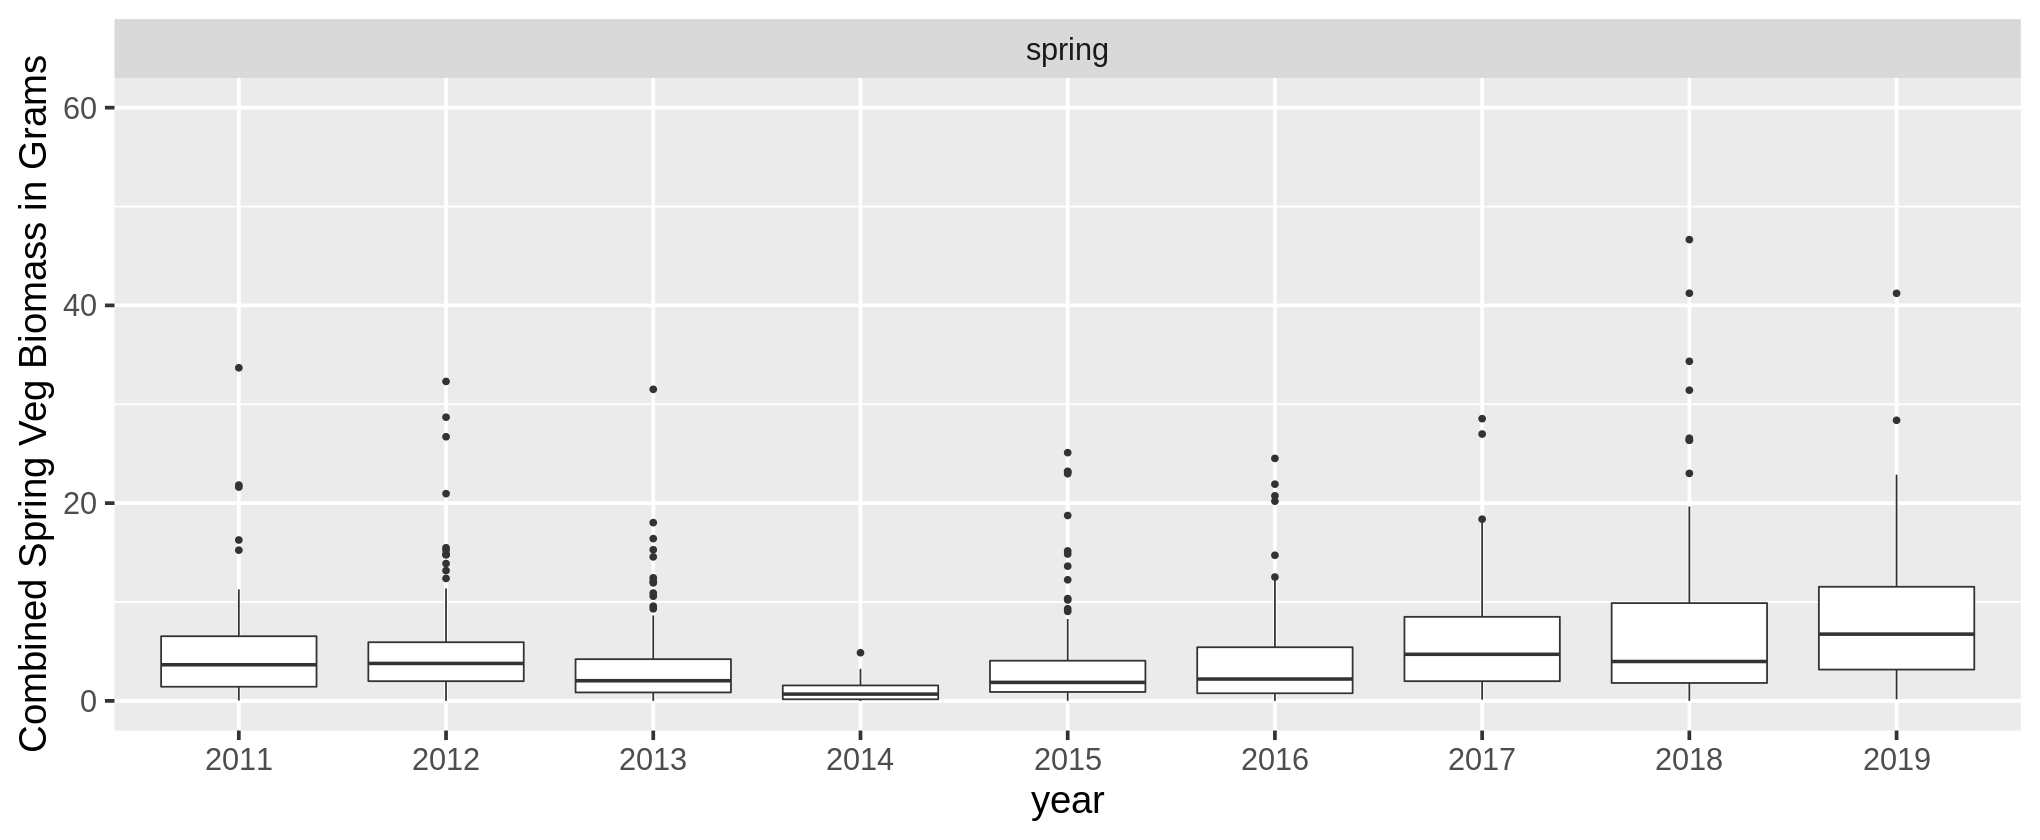

In [0]:
p <- ggplot(data = filter(combined, season == "spring")) +
  geom_boxplot(aes(x=year, y=ave_g), na.rm=TRUE)

p +
  scale_y_continuous(name="Combined Spring Veg Biomass (g)", limits=c(0,60)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

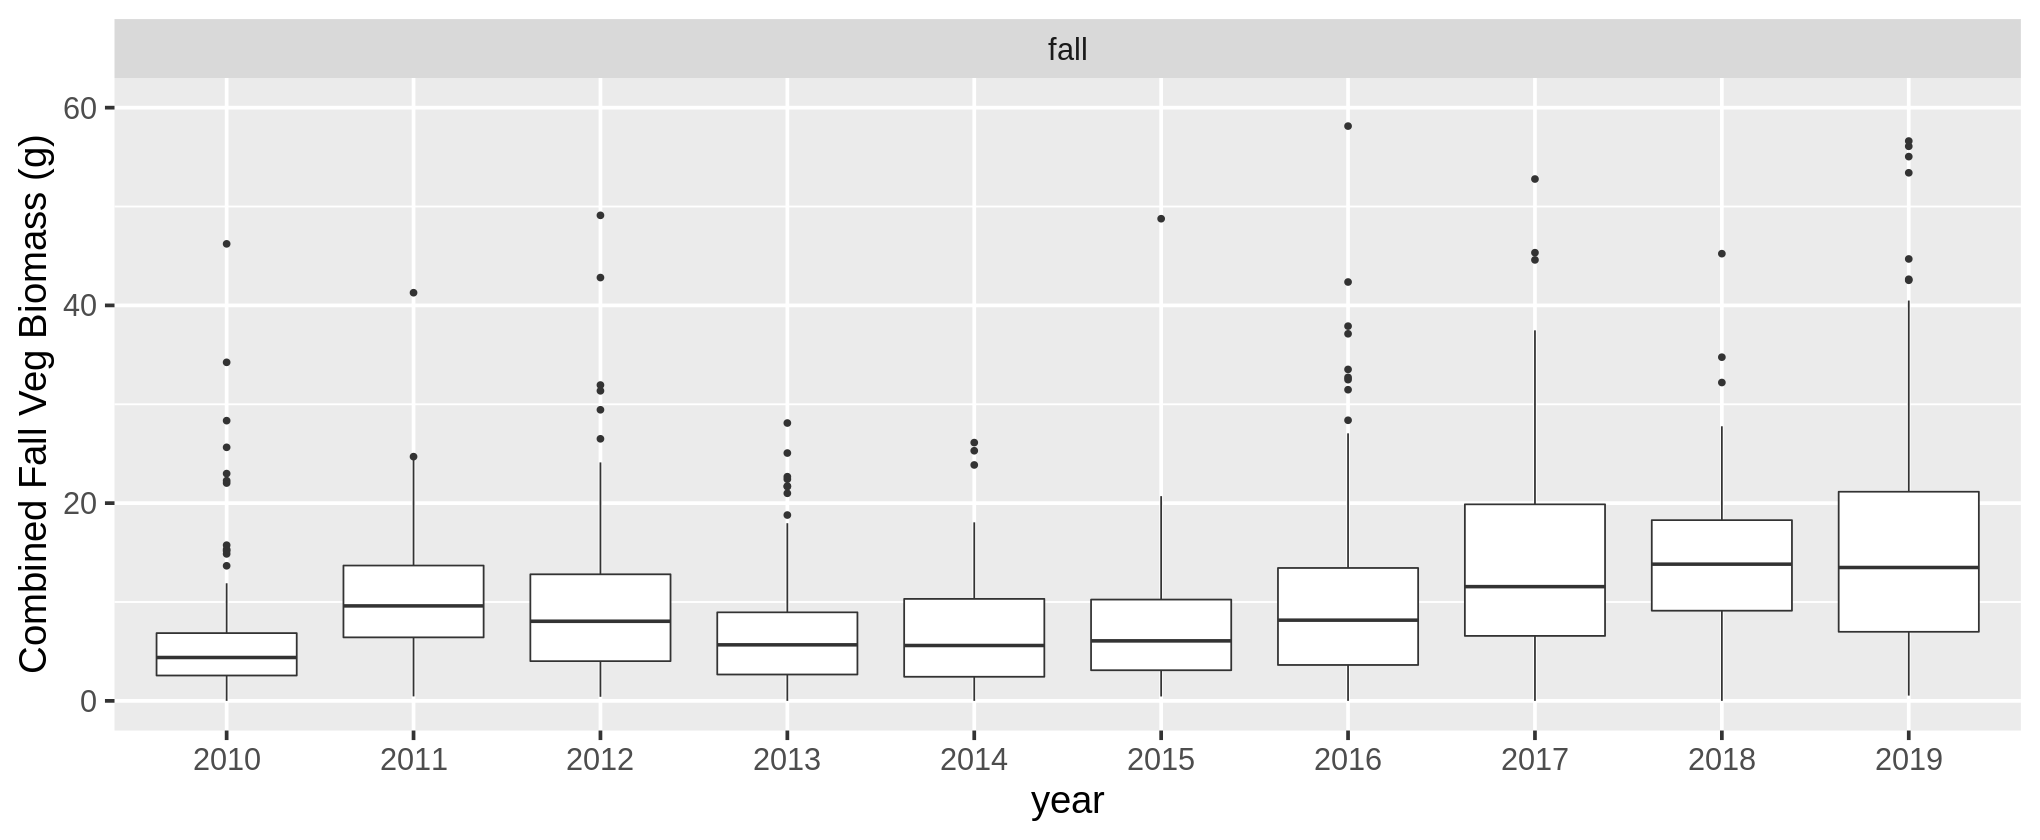

In [0]:
p <- ggplot(data = filter(combined, season == "fall")) +
  geom_boxplot(aes(x=year, y=ave_g), na.rm=TRUE)

p +
  scale_y_continuous(name="Combined Fall Veg Biomass (g)", limits=c(0,60)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)